# This is an Example of using Xarray on the EFAS NetCDF File

First we use Xarray to Open the Dataset so we can see the contents

In [85]:
import xarray as xr

ds = xr.open_dataset('/home/ma/maca/clim.nc')
ds

<xarray.Dataset>
Dimensions:                       (x: 1000, y: 950)
Coordinates:
  * y                             (y) float64 5.498e+06 5.492e+06 5.488e+06 ...
  * x                             (x) float64 2.502e+06 2.508e+06 2.512e+06 ...
    time                          datetime64[ns] 1990-01-01T06:00:00
    step                          timedelta64[ns] 1 days
    surface                       int64 0
    latitude                      (y, x) float32 66.9821 67.0096 67.037 ...
    longitude                     (y, x) float32 -35.034 -34.9443 -34.8543 ...
    valid_time                    datetime64[ns] 1990-01-02T06:00:00
Data variables:
    dis24                         (y, x) float32 nan nan nan nan nan nan nan ...
    lambert_azimuthal_equal_area  int32 -2147483647
    land_binary_mask              (y, x) int8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
Attributes:
    GRIB_edition: 2
    GRIB_centre: ecmf
    GRIB_centreDescription: European Centre for Medium-Range Weather Forecasts
    

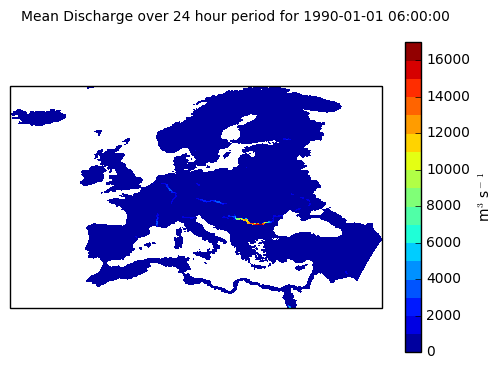

In [128]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap,cm
import numpy as np
import pandas as pd

from cartopy import config
import cartopy.crs as ccrs


dis24 = ds.dis24.values[:, :]
lats = ds.latitude.values
lons = ds.longitude.values

#plt.gca
date=pd.Timestamp(ds.dis24.time.data)

plt.figure(str(date))

plt.suptitle('Mean Discharge over 24 hour period for {s}'.format(s=date))
ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea())
cmap=plt.cm.jet

cs = plt.contourf(lons, lats, dis24,17,vmin=0.0,vmax=16800,
             transform=ccrs.LambertAzimuthalEqualArea(),cmap=cmap)
cbar = plt.colorbar(cs)
cbar.set_label('m$^3$ s$^-$$^1$')
ax.coastlines()

plt.show()

In [83]:
ds.dis24.max()

<xarray.DataArray 'dis24' ()>
array(16725.431640625, dtype=float32)

In [84]:
ds.dis24.min()

<xarray.DataArray 'dis24' ()>
array(0.00032997943344525993, dtype=float32)

In [129]:
ds.dis24.units

u'm**3 s**-1'